In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [3]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
#load the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


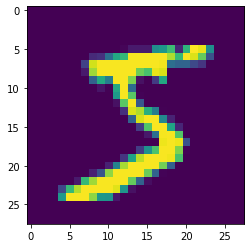

In [6]:
plt.imshow(x_train[0].reshape(28,28))

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 6s 18ms/step - loss: 0.3098 - val_loss: 0.2241
Epoch 2/15
235/235 [==============================] - 4s 16ms/step - loss: 0.2021 - val_loss: 0.1835
Epoch 3/15
235/235 [==============================] - 4s 15ms/step - loss: 0.1743 - val_loss: 0.1648
Epoch 4/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1605 - val_loss: 0.1544
Epoch 5/15
235/235 [==============================] - 4s 15ms/step - loss: 0.1521 - val_loss: 0.1482
Epoch 6/15
235/235 [==============================] - 4s 16ms/step - loss: 0.1475 - val_loss: 0.1446
Epoch 7/15
235/235 [==============================] - 5s 22ms/step - loss: 0.1447 - val_loss: 0.1422
Epoch 8/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1426 - val_loss: 0.1404
Epoch 9/15
235/235 [==============================] - 3s 15ms/step - loss: 0.1410 - val_loss: 0.1389
Epoch 10/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1395 - val_lo

313/313 [==============================] - 1s 3ms/step


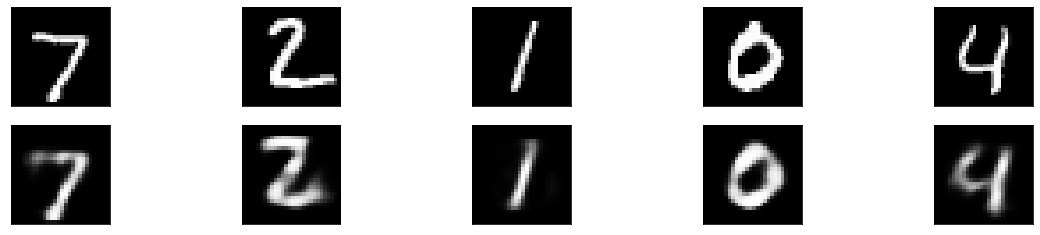

In [8]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()